In [2]:
%load_ext autoreload
%autoreload 2
from plot_Trajectory_FundementalDiagram import Plot_FD, Plot_Trajectory
import sympy as sp

In [3]:
x = sp.symbols("x")

In [4]:
# Street
q_max = 1800
k_jam = 120
v_free_flow = 60
k_opt = q_max / v_free_flow # k_opt=100
first_line = v_free_flow*x # x = [0, k_opt[100]]
second_line = -(q_max/(k_jam-k_opt))*(x-k_jam) # x = [k_opt[100], k_jam[800]]

In [8]:
# When truck comes in
v_truck = 20
second_line_truck = second_line # x = [k_opt_truck, k_jam]
first_line_truck = v_truck*x # x = [0, k_opt_truck]

Intersection point: x = 30.00, y = 1800.00


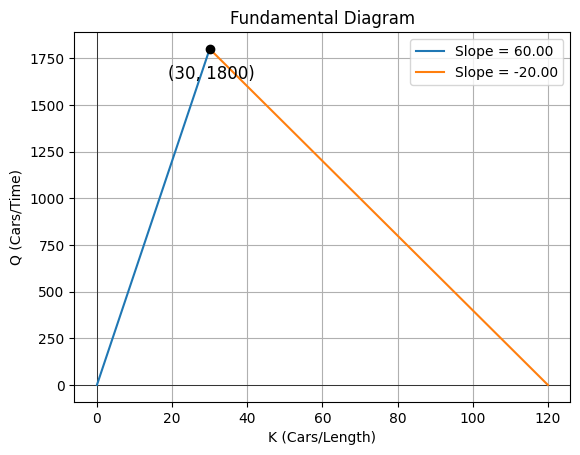

In [11]:
##################### Plot Street and Truck ##################
fd1 = Plot_FD()
fd1.get_one_diagram("Street", first_line, second_line, write_intersection=True)
fd1.save_fig("Q_1")

# fd1.get_one_diagram("Truck", first_line_truck, second_line_truck, write_intersection=True)


Intersection point: x = 80.00, y = 8000.00
Intersection point: x = 285.71, y = 5714.29


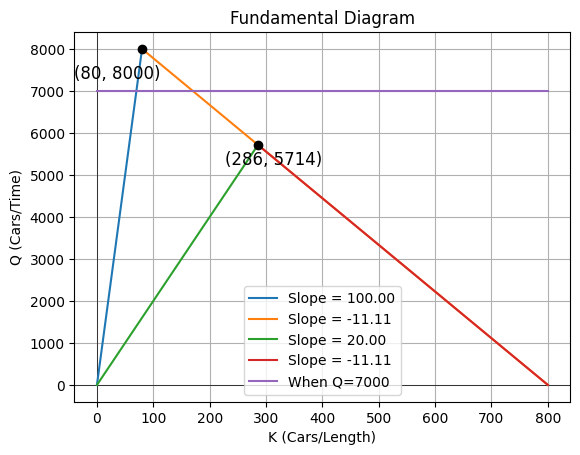

In [104]:
##################### Plot Street and Truck ##################
fd1 = Plot_FD()
fd1.get_one_diagram("Street", first_line, second_line, write_intersection=True)
fd1.get_one_diagram("Truck", first_line_truck, second_line_truck, write_intersection=True)
fd1.plot_with_constant_flow(q=7000)

In [105]:
fd1.points

{'flow=7000': {'Street1': (70, 7000),
  'Street2': (170.000000000000, 7000),
  'Truck1': (350, 7000),
  'Truck2': (170.000000000000, 7000)}}

In [106]:
trajectory = Plot_Trajectory()
trajectory.make_trajectory(constant_speed=v_free_flow, density=70, end_time=10, end_x=2000)
trajectory.make_trajectory(constant_speed=v_truck, density=286, end_time=32)
trajectory.make_trajectory(constant_speed=v_free_flow, density=80, end_time=62)
trajectory.intersections_maker()

[INFO] We plot zone 1 with 70 lines...
[INFO] We plot zone 2 with 429 lines...
[INFO] We plot zone 3 with 138 lines...


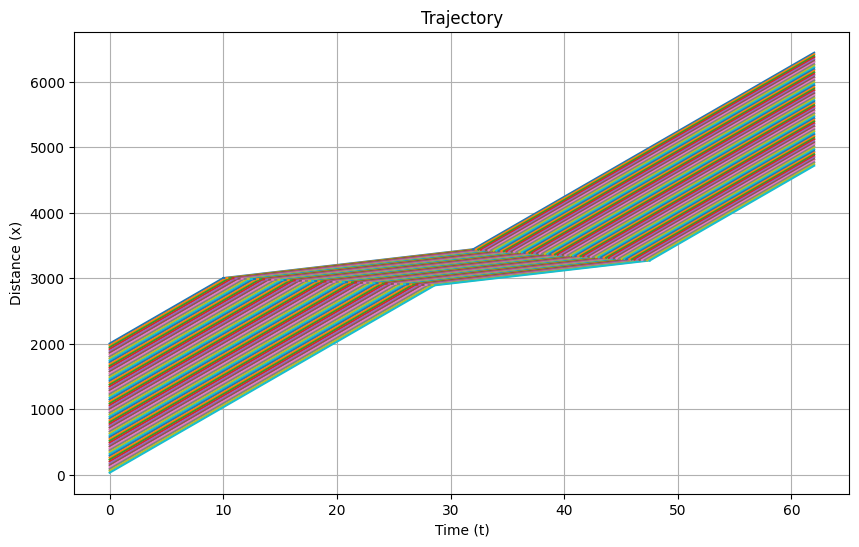

In [107]:
trajectory.fit_data()